In [2]:
# Verinin incelenmesi için oluşturulan sınıf.
#Bu sınıf otomatik olarak veri hakkında ön bilgi verecek ve görselleştirilmesini sağlayacak

class DataInspect:
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stats
    
    
    def __init__(self,data):
        self.data = data
    
    
    #Veri için açıklayıcı özet çıkaracak fonksiyon
    def preInfo(self):
        #Verinin ilk 10 satırını gösterme
        print('\033[1m' + "First 10 row of the data\n" + '\033[0m')
        print(self.data.head(10))
        
        #Verinin veri tiplerini görüntüleme
        print('\033[1m' + "\n\nTypes of the columns\n" + '\033[0m')
        print(self.data.dtypes)
        
        #Verinin özet açıklaması ( mean , std. min , max vb.)
        print('\033[1m' + "\n\nDescription of the data\n" + '\033[0m')
        print (self.data.describe())
        
        #Verideki eksik değerlerin kolonlara göre sayısı
        print('\033[1m' + "\n\nNumber of null values\n" + '\033[0m')
        print(self.data.isnull().sum(axis = 0))
        
    # Verinin görselleştirilmesi için çağırılan fonksiyon    
    def preGraph(self):
        import warnings
        warnings.filterwarnings("ignore")
        
        print('\033[1m' + "\n\nData Visualiation\n" + '\033[0m')
      
        newplt=self.plt
        
        
        #Verideki veri tiplerine göre görselleştirme
        #Eğer kolon tipi sayısal değer ise kdeplot , object ise countplot çizdirilecek 
        for i in range(len(self.data.columns)):
               
            
            if (self.data.dtypes[i] != "object"):
                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],bins = 20)
                
            else:
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure(figsize=(10,10))
        sns.boxplot(data=self.data)
        
        # Verinin Korelasyon Grafiği Gösterimi
        fig,ax = newplt.subplots(figsize=(5, 5))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        newplt.show()
        
    # Kategorik olmkayan bağımsız değişkenlerin olasılık plotunun çıkarılması    
    def testStatsPlot(self):
        
        print('\033[1m' + "\n\nTest Statistics\n" + '\033[0m')
        
        newplt=self.plt
        
        print('\033[1m' + "\n\nProbability Plots of Data \n" + '\033[0m')
        nonObjColumns =[]
        for j in range (len(self.data.columns)):
            if (self.data.dtypes[j] != "object"):
                nonObjColumns.append(j)
                
        for i in range(0,len(nonObjColumns),2):
   
            figg=newplt.figure(figsize=(15,5))
            ax1=newplt.subplot(1,2,1)
            res=stats.probplot(self.data.iloc[:,nonObjColumns[i]].dropna(),dist = "norm", plot=plt)
            ax1.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i]]))
        
            if(i!=len(nonObjColumns)-1):
            
                ax2=newplt.subplot(1,2,2)
                res2=stats.probplot(self.data.iloc[:,nonObjColumns[i+1]].dropna(),dist = "norm", plot=plt)
                ax2.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i+1]]))
                plt.show()
     
    # Bağımsız değişkenlerin normal dağılıma sahip olup olmadığını girilen alpha değeri ile kontrol ediyor 
        
    def testStatsNormTest(self,alpha,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        
        np=self.np
        stats=self.stats
        pd=self.pd
        
        alphaValue=alpha
        comparisionWithAlfa=[]
        statValueArray=[]
        pValueArray=[]
        objCol,objName,nonObjCol,nonObjName=self.typeFinder(response)

        for i in range(0,len(nonObjCol)):
            stat , p = stats.shapiro(data.iloc[:,nonObjCol[i]].dropna())
            statValueArray.append(round(stat,4))
            pValueArray.append(round(p,9))
            if (p<alphaValue):
                comparisionWithAlfa.append('Yes')
            else:
                comparisionWithAlfa.append('No')
                
        statValueArray=np.array([statValueArray])
        pValueArray=np.array([pValueArray])
        comparisionWithAlfa=np.array([comparisionWithAlfa])
        
        pStatsDf=pd.DataFrame(np.concatenate((pValueArray,statValueArray,comparisionWithAlfa), axis=0))
        pStatsDf.columns =nonObjName
        pStatsDf.index=["P Value","Statistics","p<a ?"]
        return (pStatsDf)
 

                                                 
    def typeFinder(self,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        objColumns=[]
        objColumnNames=[]
        nonObjColumns=[]
        nonObjColumnNames=[]
        
        for j in range (len(data.columns)):
                    if (data.dtypes[j] == "object"):
                        objColumns.append(j)
                        objColumnNames.append(data.columns[j])
                        
                    else:
                        nonObjColumns.append(j)
                        nonObjColumnNames.append(data.columns[j])
                        
        return objColumns,objColumnNames,nonObjColumns,nonObjColumnNames
                                        
    
    def test(self):
        objCol,objName,nonObjcol,nonobjName=self.typeFinder()
        print(objCol)
        print(objName)
        print(nonObjcol)
        print(nonobjName)

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Decision Tree Regresyon - Forex Datası

In [3]:
forexDataOrj=pd.read_excel("HW_Data_Set.xlsx")


In [50]:
forexDf=forexDataOrj.copy()

In [51]:
# hedef değişkeni olarak 20_target üzerinden işlem yapacağım
forexDf.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [52]:
forexDf=forexDf.drop(["90_target","50_target"],axis = 1)

In [53]:
forexDf.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802


In [54]:
classData = DataInspect(forexDf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("20_target")

In [55]:
# Öncelikle Vif değerlerini bulup veride kolon sayısını düşürmem gerekiyor. Karar ağacında bu kadar veri sorun oluşturabilir.
#  veriyi Vif algoritmasına sokabilmek için object kolonlarının testip edip çıkaracağım.

In [56]:
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [60, 128, 129]
Object tipindeki kolon isimleri : ['ind_109', 'ind_420', 'ind_422']


In [58]:
# ind_109 anlamlı bir object olarak görünüyor ancak diğer iki indis object değil .içinde null değerler var
# bu nedenle ileride sadece ind_109 veriye tekrar eklenecek
forexDf[objColumnNames].head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [17]:
# object olan kolonlar atıldı
forexDf=forexDf.drop(objColumnNames,axis = 1)

In [18]:
forexDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 131 entries, ind_5 to 20_target
dtypes: float64(86), int64(45)
memory usage: 6.2 MB


In [24]:
# verinin X ve y olarak ayrımı
X= forexDf.iloc[:,:-1]
y = forexDf.iloc[:,-1]

In [29]:
X.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906


In [30]:
y.head()

0    15.135802
1    15.143348
2    15.146870
3    15.153283
4   -15.179065
Name: 20_target, dtype: float64

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# multicollinearity kontrolü , burada feature sayısını azaltacağım
xVifValues = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [34]:
columnNames = X.columns

In [35]:
# vif değerlerinin ve karşılık gelen kolonların oluşturulması
newdata2Df=pd.DataFrame(xVifValues,columnNames)
newdata2Df.columns = ["Vif Degeri"]
newdata2Df.head()

,Vif Degeri
ind_5,1898.750925
ind_6,1240.114364
ind_8,inf
ind_9,inf
ind_10,inf


In [37]:
# Burada vif değeri 20 altında olanları alıyorum.
xAfterVif=forexDataOrj.loc[:,newdata2Df.iloc[:][newdata2Df["Vif Degeri"] < 20].index]

In [49]:
# 20 altında olan vif değerlerini aldığımmızda kolon sayısı 130 dan 44 e düşmekte. 
print ("Vif yapılmadan önce kolon sayısı : {}".format(X.shape[1]))
print ("Vif yapıldıktan sonra kolon sayısı : {}".format(xAfterVif.shape[1]))

Vif yapılmadan önce kolon sayısı : 130
Vif yapıldıktan sonra kolon sayısı : 44


In [61]:
# ind_109 olan object kolonunun X lere tekrar eklenmesi. (green , red olan obje)
xAfterVif= pd.concat([xAfterVif,forexDataOrj["ind_109"] ], axis=1, sort=False)

In [74]:
xAfterVif=xAfterVif.drop("ind_109",axis = 1)

In [75]:
# Regresyon Karar Ağacı Modellenmesi

In [187]:
X_train, X_test, y_train, y_test = train_test_split(xAfterVif, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
from sklearn.neural_network import MLPRegressor

In [223]:
cart_model = DecisionTreeRegressor(min_samples_split = 4,max_leaf_nodes=11)

In [224]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=11, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

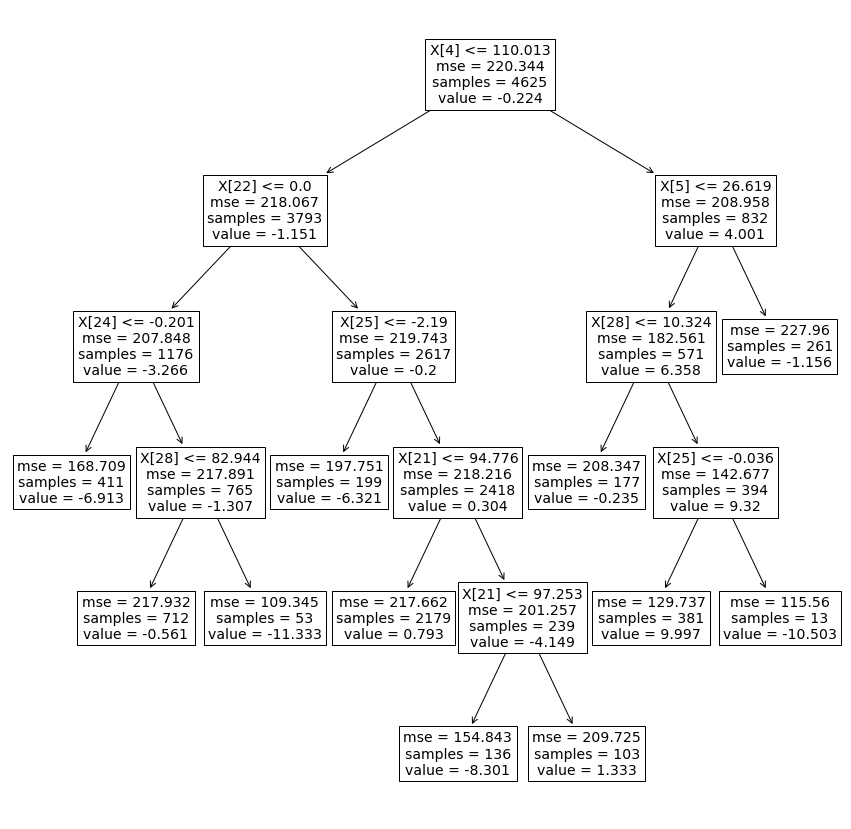

In [225]:
plt.figure(figsize=(15,15))
tree.plot_tree(cart_model);

In [226]:
y_pred =cart_model.predict(X_test)

In [227]:
y_pred

array([ 0.79256323, -1.15570601,  0.79256323, ...,  0.79256323,
       -6.9133347 ,  0.79256323])

In [228]:
np.sqrt(mean_squared_error(y_test, y_pred))

14.677123594272613

In [182]:
# bir de kolonların vif ile azaltılmamış haliyle deneyelim

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [184]:
#Görüldüğü üzere MSE'de oynama çok az miktarda. kolon sayısı 130 dan 44 e düşürüldü ve MSE neredeyse aynı. Modeli hafifletmiş olduk
cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

15.071487635995565

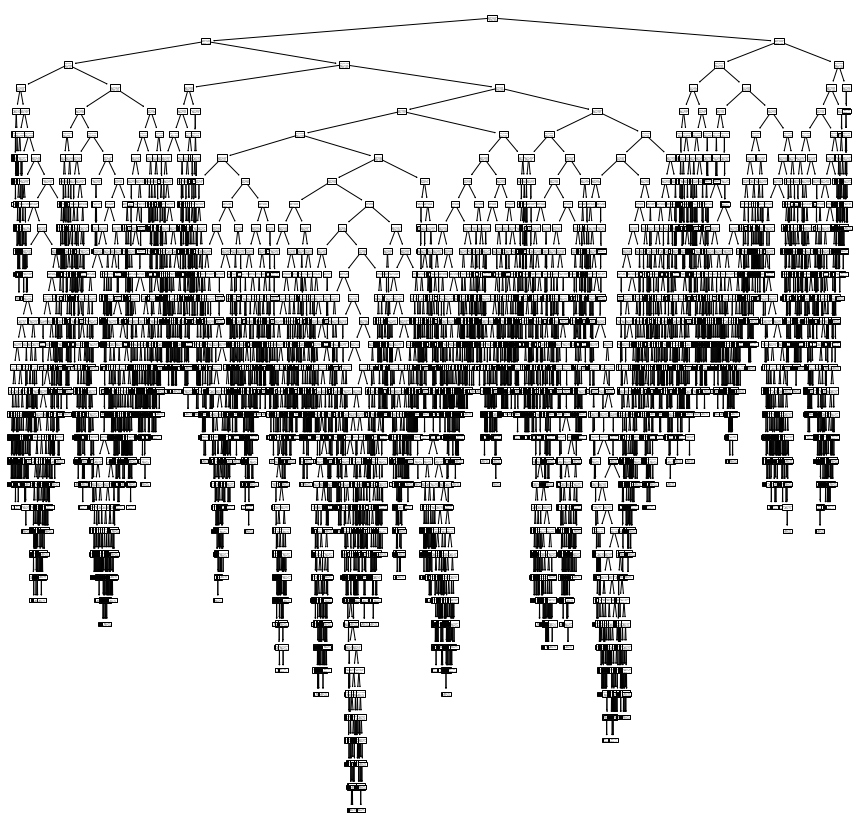

In [166]:
# aman allahım çok korkunç bir Decision Tree
#plt.figure(figsize=(15,15))
#tree.plot_tree(cart_model);

In [121]:
#!pip install skompiler

In [122]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

((((((15.083296485 if x[17] <= 0.0010827860096469522 else 15.07694546 if x[
    129] <= 0.30926118791103363 else 15.07933496 if x[76] <= 
    -1.6160526275634766 else 15.07858038) if x[114] <= -61.619585037231445 else
    (15.08914445 if x[2] <= 39.28571534156799 else 15.08637767) if x[30] <=
    20.154351711273193 else 15.09367192 if x[59] <= -2.351120173931122 else
    15.09442649) if x[75] <= 42.425270080566406 else ((14.51189328 if x[70] <=
    36.4290828704834 else (((15.15667907 if x[74] <= 51.25946044921875 else
    15.15957161) if x[66] <= -23.0 else 15.15026517) if x[103] <= 
    -0.5778117179870605 else 15.33387883) if x[91] <= 102.27169799804688 else
    ((14.97809592 if x[2] <= 32.14285755157471 else 14.9808627) if x[39] <=
    17.5 else 14.98853423 if x[69] <= 31.209653854370117 else 14.9916783 if
    x[99] <= 0.5966627597808838 else 14.99042067) if x[89] <= 
    51.9594841003418 else 15.04525324 if x[74] <= 45.422834396362305 else 
    15.04751697) if x[94] <= -0.09608556

## Tuning

In [212]:
X_train, X_test, y_train, y_test = train_test_split(xAfterVif, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [213]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [215]:
cart_params = {"min_samples_split":range(2,100),
              "max_leaf_nodes": range (2,20)}

In [219]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10,verbose = 1)

In [220]:
#cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 1764 candidates, totalling 17640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 17640 out of 17640 | elapsed: 11.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 20),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [221]:
cart_cv_model.best_params_

{'max_leaf_nodes': 16, 'min_samples_split': 71}

In [229]:
# Error 14.678 den  14.615 e düştü grid search ile ancak leaf ve node değerleri artarak daha karışık bir model oldu
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 16, min_samples_split = 17)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

14.615847139016102

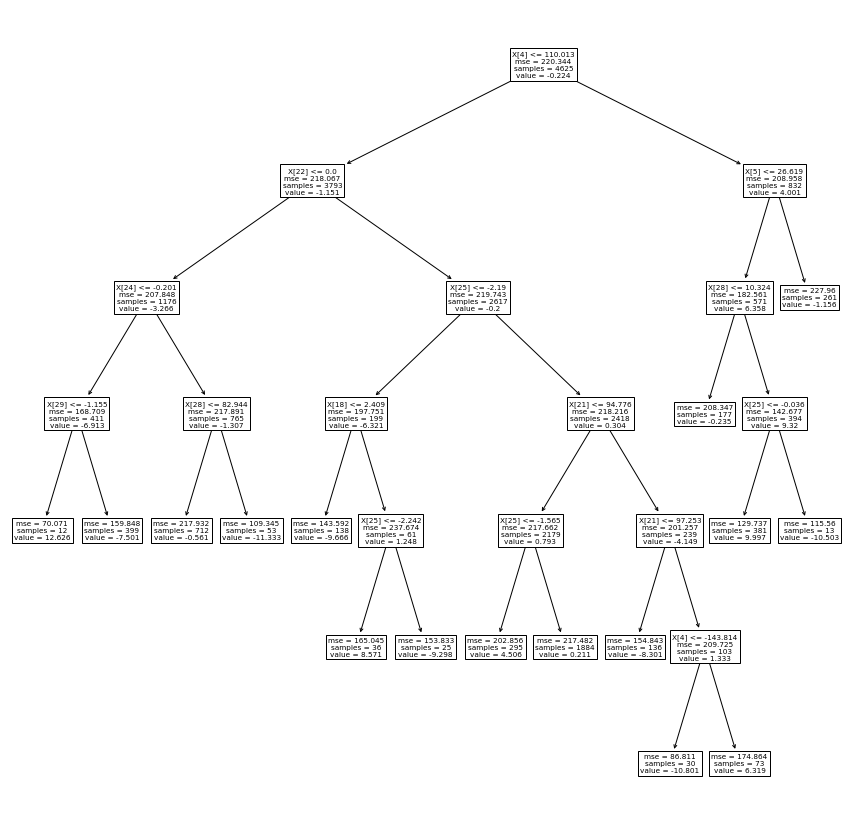

In [230]:
plt.figure(figsize=(15,15))
tree.plot_tree(cart_tuned);

# Decision Tree Classification - Banka Datası

In [346]:
from sklearn.tree import DecisionTreeClassifier

In [299]:
bankaDataOrj = pd.read_csv("hmelq.csv")

In [312]:
bankadf = bankaDataOrj.copy()

In [313]:
bankadf.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [314]:
bankadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [263]:
bankadf.job.isnull().sum()

167

In [315]:
# nulları atınca satır sayısı 3576 dan 2018 e düştü
bankadf=bankadf.dropna()
bankadf.head(5)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [316]:
# veride kategorik değişkenler mevcut , bunları dummy hale getireceğiz
bankadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [317]:
classData = DataInspect(bankadf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("bad")

In [318]:
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [3, 4]
Object tipindeki kolon isimleri : ['reason', 'job']


In [348]:
# verinin X ve y olarak ayrımı
X= bankadf.drop("bad",axis = 1 )
y = bankadf["bad"]

In [349]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [350]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        objColumnNames)], 
                                      remainder='passthrough') 
  
X = np.array(columnTransformer.fit_transform(X), dtype = np.str) 

In [351]:
X = pd.DataFrame(X)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.458999999999996
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [355]:
# default değerler ile  DT yapımı
cart_model = DecisionTreeClassifier(random_state=0)

In [356]:
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [242]:
X

,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...
3571,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


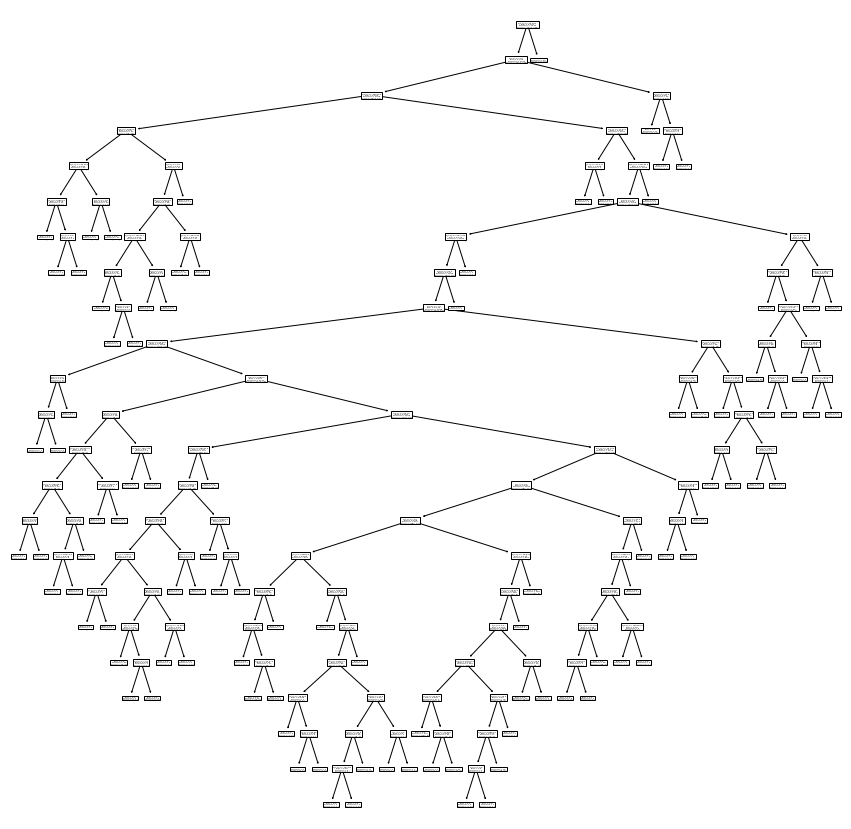

In [357]:
plt.figure(figsize=(15,15))
tree.plot_tree(cart_model);

In [362]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred =cart_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[460,   6],
       [ 21,  18]], dtype=int64)

In [365]:
#default değerde accuracy skorumuz %94.7 değerinde
accuracy_score(y_test,y_pred)

0.9465346534653465

In [359]:
# Mse değer düşük ancak leaf oranı çok yüksek. Tuning ile karmaşıklık azaltılacak
np.sqrt(mean_squared_error(y_test, y_pred))

0.23122574799241857

In [368]:
# mevcut modelde 1 leri tahmin etmede biraz sıkıntı yaşandığı görülüyor
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       466
           1       0.75      0.46      0.57        39

    accuracy                           0.95       505
   macro avg       0.85      0.72      0.77       505
weighted avg       0.94      0.95      0.94       505



In [366]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

((((((0 if x[9] <= 30859.0 else 0 if x[4] <= 0.5 else 1) if x[17] <= 
    32.76449966430664 else 0 if x[11] <= 1.5 else 1) if x[8] <= 9050.0 else
    (((0 if x[12] <= 0.5 else 0 if x[16] <= 8.0 else 1) if x[10] <= 45602.0
     else 0 if x[0] <= 0.5 else 1) if x[8] <= 12750.0 else 0 if x[14] <= 
    324.5449981689453 else 1) if x[12] <= 3.5 else 1) if x[10] <= 48600.0 else
    (1 if x[17] <= 37.44599914550781 else 0) if x[14] <= 44.345001220703125
     else (((((((1 if x[11] <= 3.0 else 0) if x[3] <= 0.5 else 1) if x[14] <=
    60.404998779296875 else ((((1 if x[11] <= 3.0 else 0) if x[10] <= 
    58139.5 else (1 if x[9] <= 68316.0 else 0) if x[11] <= 1.5 else 0) if x
    [10] <= 121579.0 else 1 if x[9] <= 109863.5 else 0) if x[12] <= 0.5 else
    1 if x[14] <= 160.40499877929688 else 0) if x[8] <= 6950.0 else (((((1 if
    x[17] <= 33.51150035858154 else 0) if x[9] <= 38380.5 else (0 if x[1] <=
    0.5 else 1 if x[15] <= 1.0 else 0) if x[13] <= 0.5 else 1 if x[14] <= 
    75.3549995422

## Tuning

In [477]:
cart_model = DecisionTreeClassifier(random_state=0)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [478]:
cart_params = {"min_samples_split":range(2,80),
              "max_leaf_nodes": range (2,20)}

In [479]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10,verbose = 1)

In [480]:
#cart_cv_model.fit(X_train, y_train)

In [481]:
cart_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [482]:
cart_tuned = DecisionTreeClassifier(max_leaf_nodes = 3, min_samples_split = 2)
cart_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [483]:
y_pred =cart_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[462,   4],
       [ 25,  14]], dtype=int64)

In [484]:
accuracy_score(y_test,y_pred)

0.9425742574257425

In [485]:
# default değerlerle yapılan DT ye göre neredeyse aynı çıktı.
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       466
           1       0.78      0.36      0.49        39

    accuracy                           0.94       505
   macro avg       0.86      0.68      0.73       505
weighted avg       0.94      0.94      0.93       505



In [447]:
?cart_tuned

In [486]:
# Buradan görüldüğü üzere sadece 13 ve 17inci kolonlar sonuç değişkeninde etkili ( delinq ile debtinc)
# bu yüzden modeli sadece 13 ve 17inci kolonlar ile tekrar kuracağım
cart_tuned.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24061612, 0.        ,
       0.        , 0.        , 0.75938388])

In [545]:
importantXtrain= X_train.iloc[:,[13,17]]
importantXtest = X_test.iloc[:,[13,17]]

In [546]:
cart_model = DecisionTreeClassifier(max_leaf_nodes = 3, min_samples_split = 2)
cart_model.fit(importantX, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [547]:
print(skompile(cart_model.predict).to('python/code'))

((0 if x[0] <= 3.5 else 1) if x[1] <= 45.48349952697754 else 1)



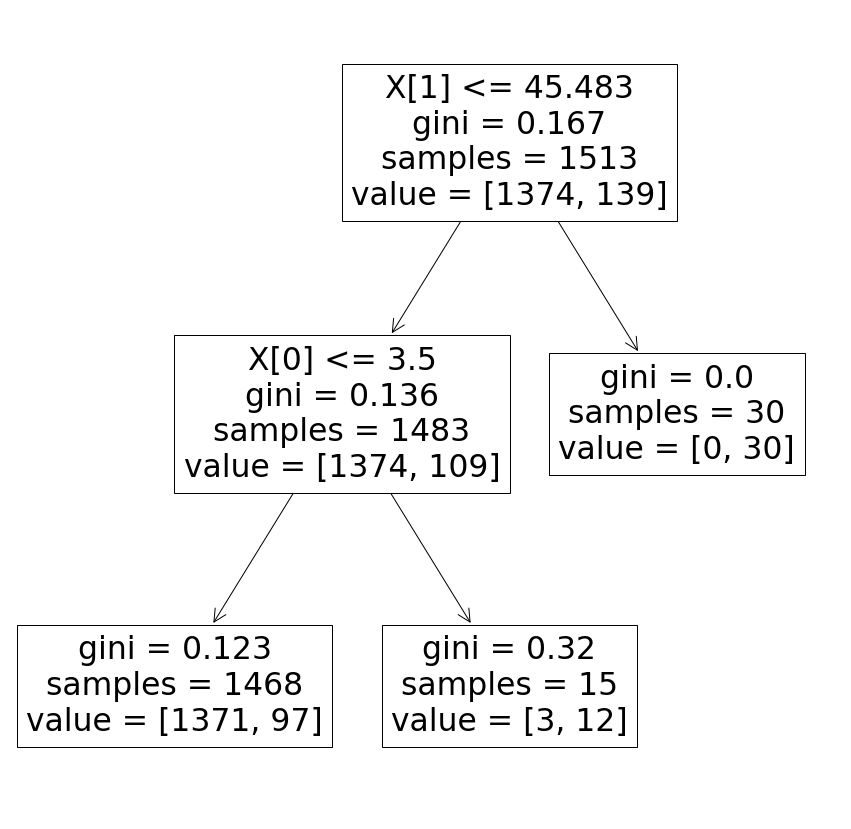

In [541]:
plt.figure(figsize=(15,15))
tree.plot_tree(cart_model);

In [548]:
y_pred =cart_model.predict(importantXtest)
confusion_matrix(y_test, y_pred)

array([[462,   4],
       [ 25,  14]], dtype=int64)

In [549]:
accuracy_score(y_test,y_pred)

0.9425742574257425

In [516]:
#görüldüğü üzere sadece 13 ve 17inci kolonlar ile model kurduğummda %90 lık bir doğruluğa sahip
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       466
           1       0.37      0.41      0.39        39

    accuracy                           0.90       505
   macro avg       0.66      0.68      0.67       505
weighted avg       0.91      0.90      0.90       505



# Neural Network - Banka Datası

In [4]:
bankaDataOrj = pd.read_csv("hmelq.csv")
bankadf = bankaDataOrj.copy()
bankadf=bankadf.dropna()
bankadf.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [5]:
classData = DataInspect(bankadf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("bad")
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [3, 4]
Object tipindeki kolon isimleri : ['reason', 'job']


In [14]:
# verinin X ve y olarak ayrımı
X= bankadf.drop("bad",axis = 1 )
y = bankadf["bad"]

In [15]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        objColumnNames)], 
                                      remainder='passthrough') 
  
X = np.array(columnTransformer.fit_transform(X), dtype = np.str) 
X = pd.DataFrame(X)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.458999999999996
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,20))

In [19]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
mlp_model.n_layers_

4

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred =mlp_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[466,   0],
       [ 38,   1]], dtype=int64)

In [22]:
#default değerde accuracy skorumuz %86.9 değerinde
accuracy_score(y_test,y_pred)

0.9247524752475248

In [23]:
# mevcut modelde 1 leri tahmin etmede biraz sıkıntı yaşandığı görülüyor
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       1.00      0.03      0.05        39

    accuracy                           0.92       505
   macro avg       0.96      0.51      0.51       505
weighted avg       0.93      0.92      0.89       505



## Tuning

In [24]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [25]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10,verbose=1)

In [26]:
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  8.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(100, 20),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [28]:
mlp_cv_model.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20, 20)}

In [30]:
mlp_tuned = MLPClassifier(alpha = 0.1, hidden_layer_sizes = (20,20))
mlp_tuned.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred =mlp_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[466,   0],
       [ 38,   1]], dtype=int64)

In [35]:
#tuning modelde accuracy skorumuz %92.5 değerinde
accuracy_score(y_test,y_pred)

0.9247524752475248

# Random Forest - Banka Datası

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [39]:
rf_model = RandomForestClassifier(random_state = 42)

In [40]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred =rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[465,   1],
       [ 23,  16]], dtype=int64)

In [42]:
#default değerde accuracy skorumuz %95.24 değerinde
accuracy_score(y_test,y_pred)

0.9524752475247524

In [43]:
# mevcut modelde 1 leri tahmin etmede biraz sıkıntı yaşandığı görülüyor
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       0.94      0.41      0.57        39

    accuracy                           0.95       505
   macro avg       0.95      0.70      0.77       505
weighted avg       0.95      0.95      0.94       505



## Tuning

In [53]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000],
            }

In [54]:
rf_model = RandomForestClassifier(random_state = 42)

In [55]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10,verbose=1, n_jobs = -1)

In [56]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'m

In [57]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 100}

In [58]:
rf_tuned = RandomForestClassifier(max_depth  = 8, 
                                 max_features = 5, 
                                 n_estimators =100)

In [59]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred =rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[466,   0],
       [ 24,  15]], dtype=int64)

In [65]:
#tuning ile bu skor %0.95 değerinde ve default ile aynı değerde
accuracy_score(y_test,y_pred)

0.9524752475247524

In [66]:
# mevcut modelde 1 leri tahmin etmede biraz sıkıntı yaşandığı görülüyor
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       466
           1       1.00      0.38      0.56        39

    accuracy                           0.95       505
   macro avg       0.98      0.69      0.77       505
weighted avg       0.95      0.95      0.94       505



In [69]:
# Karşılaştırılma yaptığımızda en iyi accuracy skoru Random Forest algoritması vermemektedir.